## Scaffold analysis - CB1 ligands

In [38]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [3]:
#Loading my dataset
with open('cannabinoid.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    can_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        pchembl = m['pChEMBL Value']
        if not pchembl:
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) 
        can_ligands.append(mol)

In [2]:
#Load drugbank data
drugbank = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in drugbank if m]

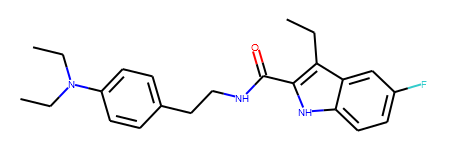

In [4]:
#First ligand in my set
can_ligands[0]

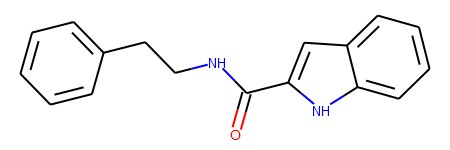

In [5]:
#Getting scaffold
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(can_ligands[0])
scaffold1

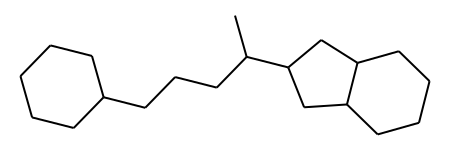

In [8]:
#Scaffold n. 2
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

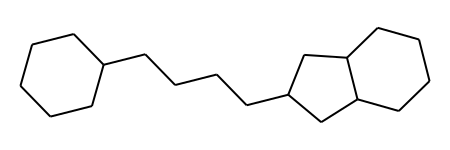

In [9]:
#Scaffold n. 3
scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
scaffold3

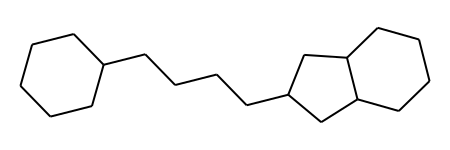

In [12]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) 
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) 
    except ValueError: 
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff)
    return scaff
scaffold(can_ligands[0])

In [13]:
#Scaffold in drugbank
drugbank_scaffolds = [scaffold(drug) for drug in drugs]
drugbank_scaffolds[:20]

 None,

In [14]:
#Rdkit mol instances turning to smiles
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]
drugbank_scaffolds_smiles[:20]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (12, ''),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (15, ''),
 (16, ''),
 (17, ''),
 (18, 'C1CCCC1'),
 (19, ''),
 (20, '')]

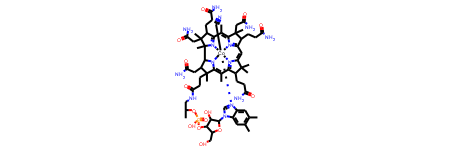

In [15]:
#Structure that is no scaffoled
drugs[8]

In [16]:
scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)
scaffolds2drugs

{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': [0,
  2059],
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': [1,
  529],
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': [2, 5, 2324],
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': [3,
  4676],
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': [4],
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': [6],
 'C1CCCCC1': [7,
  13,
  27,
  39,
  54,
  56,
  59,
  67,
  72,
  73,
  78,
  81,
  82,
  89,
  102,
  108,
  112,
  123,
  126,
  127,
  131,
  134,
  149,
  154,
  155,
  161,
  171,
  181,
  192,
  196,
  198,
  202,
  206,
  224,
  228,
  234,
  257,
  258,
  268,
  276,
  285,
  305,
  306,
  310,
  315,
  318,
  333,
  336,
  346,
  350,
  361,
  370,
  375,
  376,
  378,
  381,
  386,
  408,
  416,
  429,
  430,
  435,
  443,
  459,
  477,
  479,
  484,
  494,
  495,
  497,
  512,
  514,

In [17]:
#Most frequent scaffold among drugs
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:20]

(1545,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 3),
  ('C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 1),
  ('C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 1),
  ('C1CCCCC1', 1039),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
  ('C1CCCC1', 188),
  ('C1CCC2C(C1)CCC2C1CCCC1', 165),
  ('', 976),
  ('C1CC2CCCC2C1', 15),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 28),
  ('C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1', 2),
  ('C1CCC2CC3CCCCC3CC2C1', 57),
  ('C1CCC2CCCC2C1', 192),
  ('C1CCC(CC2CCCC2)CC1', 74),
  ('C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1', 17),
  ('C1CCC2CCCCC2C1', 169),
  ('C1CCC(C2CCCCC2C2CCCC2)CC1', 1)])

In [18]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:20]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 169),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
 ('C1CCC(CCCCC2CCCCC2)CC1', 53),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 48),
 ('C1CCC(CCC2CCCC2)CC1', 43),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 41),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 34)]

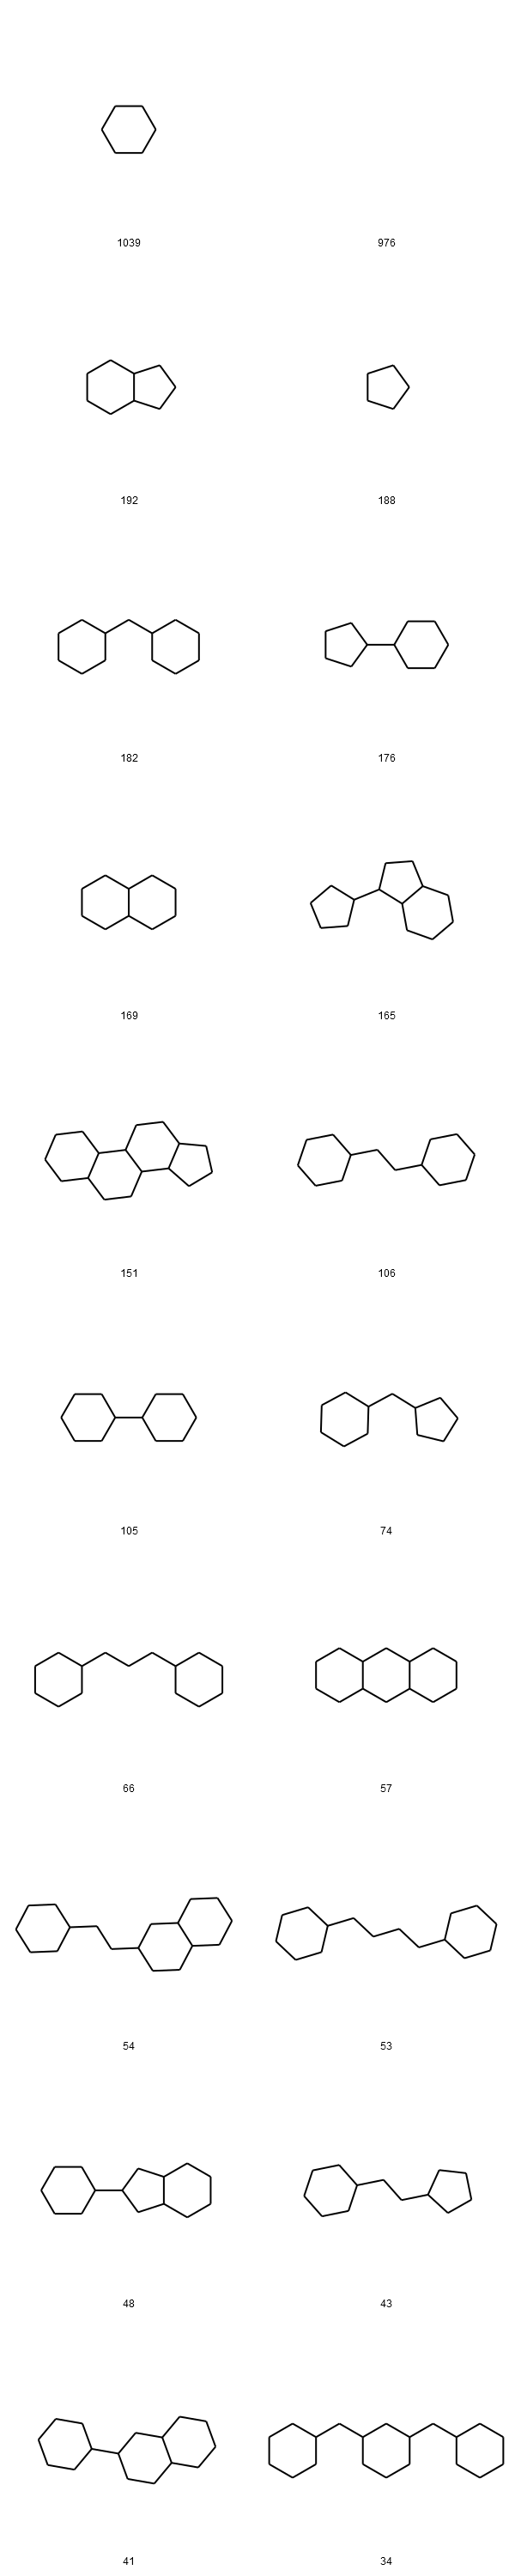

In [20]:
#The most common Murcko scaffolds within DrugBank
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[:20]])

In [25]:
#Scaffold analysis for our dataset
can_scaffolds_smiles = [(i, Chem.MolToSmiles(scaffold(ligand))) for i, ligand in enumerate(can_ligands)]
can_scaffolds_smiles[:20]

[(0, 'C1CCC(CCCCC2CC3CCCCC3C2)CC1'),
 (1, 'C1CCC(CC2CCC(C3CCC(C4CCCCC4)C(C4CCCCC4)C3)CC2)CC1'),
 (2, 'C1CCC(CCC2CCCC(CC3CCCCC3)C2)CC1'),
 (3, 'C1CCC(C2CC3CCCCC3C(CCC3CCC(CCC4CCCC4)CC3)C2)CC1'),
 (4, 'C1CCC(C2CCC(CCCCC3CC4CCCCC4C3)CC2)CC1'),
 (5, 'C1CCC(CCC2CCCC3CCC4CCCCC4C23)CC1'),
 (6, 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1'),
 (7, 'C1CCC(CCCC2CCC3CCC(CC4CCCC(C5CCCCC5)C4)C3C2)CC1'),
 (8, 'C1CCC2C(C1)CCC2CC1CCCC(C2CCCC3CCCC32)C1'),
 (9, 'C1CCC(C2CCCCC2)CC1'),
 (10, 'C1CCC2CC3CCCCC3CC2C1'),
 (11, 'C1CCC2CC3CCCCC3CCC2C1'),
 (12, 'C1CCCCC1'),
 (13, 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCC3)C2)CC1'),
 (14, 'C1CCC(C2CCC3C(C2)CC(C2CCCCC2)C3C2CCCCC2)CC1'),
 (15, 'C1CCC(CCC2CCC(C3CCCCC3)C(C3CCCCC3)C2)CC1'),
 (16, 'C1CCC(CCCC2CCCC(C3CCCCC3)C2)CC1'),
 (17, 'C1CCCCC1'),
 (18, 'C1CCC(CC2CCC(CC3CC3C3CCCCC3)CC2)CC1'),
 (19, 'C1CCC(CC(CCCCCC2CCCC2)C2CCCCC2)CC1')]

In [37]:
#scaffold analysis for our ligand se
scaffolds2ligands = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in can_scaffolds_smiles}
for ligand_idx, scaffoldsmiles in can_scaffolds_smiles:
    scaffolds2ligands[scaffoldsmiles].append(ligand_idx)
scaffolds2ligands

{'C1CCC(CCCCC2CC3CCCCC3C2)CC1': [0,
  341,
  396,
  430,
  490,
  617,
  748,
  752,
  1118,
  1119,
  1121,
  1242,
  1331,
  1334,
  1568,
  1828,
  1837,
  1978,
  2075,
  2150,
  2151,
  2152,
  2157,
  2247,
  2319,
  2546,
  2614,
  2755,
  2850,
  2885,
  2886,
  2958],
 'C1CCC(CC2CCC(C3CCC(C4CCCCC4)C(C4CCCCC4)C3)CC2)CC1': [1],
 'C1CCC(CCC2CCCC(CC3CCCCC3)C2)CC1': [2,
  53,
  482,
  500,
  585,
  635,
  817,
  1072,
  1325,
  1460,
  1528,
  1892,
  2175,
  2351,
  2360],
 'C1CCC(C2CC3CCCCC3C(CCC3CCC(CCC4CCCC4)CC3)C2)CC1': [3,
  202,
  213,
  516,
  943,
  1101,
  2012,
  2245,
  2464,
  2594],
 'C1CCC(C2CCC(CCCCC3CC4CCCCC4C3)CC2)CC1': [4,
  596,
  1157,
  1647,
  1803,
  1950,
  2018,
  2155,
  2210,
  2331,
  2557,
  2674,
  2868,
  3026],
 'C1CCC(CCC2CCCC3CCC4CCCCC4C23)CC1': [5, 828, 2248, 2444, 2758],
 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1': [6,
  59,
  76,
  111,
  197,
  198,
  201,
  214,
  243,
  276,
  292,
  299,
  311,
  319,
  355,
  356,
  381,
  397,
  398,
  405

In [27]:
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)
len(scaffold_ligandcount), scaffold_ligandcount

(643,
 [('C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 159),
  ('C1CCCCC1', 132),
  ('C1CCC(CCCC2CCC(C3CCCCC3)C2)CC1', 126),
  ('', 96),
  ('C1CCC(CCCCCC(CC2CCCCC2)C2CCCCC2)CC1', 82),
  ('C1CCC(C2CC3CCCCC3CC2C2CCCCC2)CC1', 81),
  ('C1CCC(CCCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 75),
  ('C1CCC(CCC2CCC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 73),
  ('C1CCC(CCCC2CCCC(C3CCCCC3)C2)CC1', 73),
  ('C1CCC(C2CCCCC2)CC1', 55),
  ('C1CCC2CCCCC2C1', 50),
  ('C1CCC(C2CCC(CC3CC(C4CCCCC4)C(C4CCCCC4)C3)CC2)CC1', 45),
  ('C1CCC(CCC2CC(C3CCCCC3)C(C3CCCC3)C2)CC1', 43),
  ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 43),
  ('C1CCC(CCCC2CCCC(C3CCCC(C4CCCC4)C3)C2)CC1', 41),
  ('C1CCC(C2CCC(CCCC3CC4CCCCC4C3)CC2)CC1', 36),
  ('C1CCC(CC2CCC3CCCCC32)CC1', 36),
  ('C1CCC(CCCCC2CC3CCCCC3C2)CC1', 32),
  ('C1CCC(CCC2CCCCC2)CC1', 32),
  ('C1CCC(CC2CCCCC2)CC1', 32),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 28),
  ('C1CCC2CCCC2C1', 27),
  ('C1CCC(CCC2CCC(C(C3CCCCC3)C3CCCCC3)CC2)CC1', 27),
  ('C1CCC(CC2CCC(CCCC3CC3)CC2)CC1', 22),
  ('C1CCCC1', 21),
  ('C1CCC

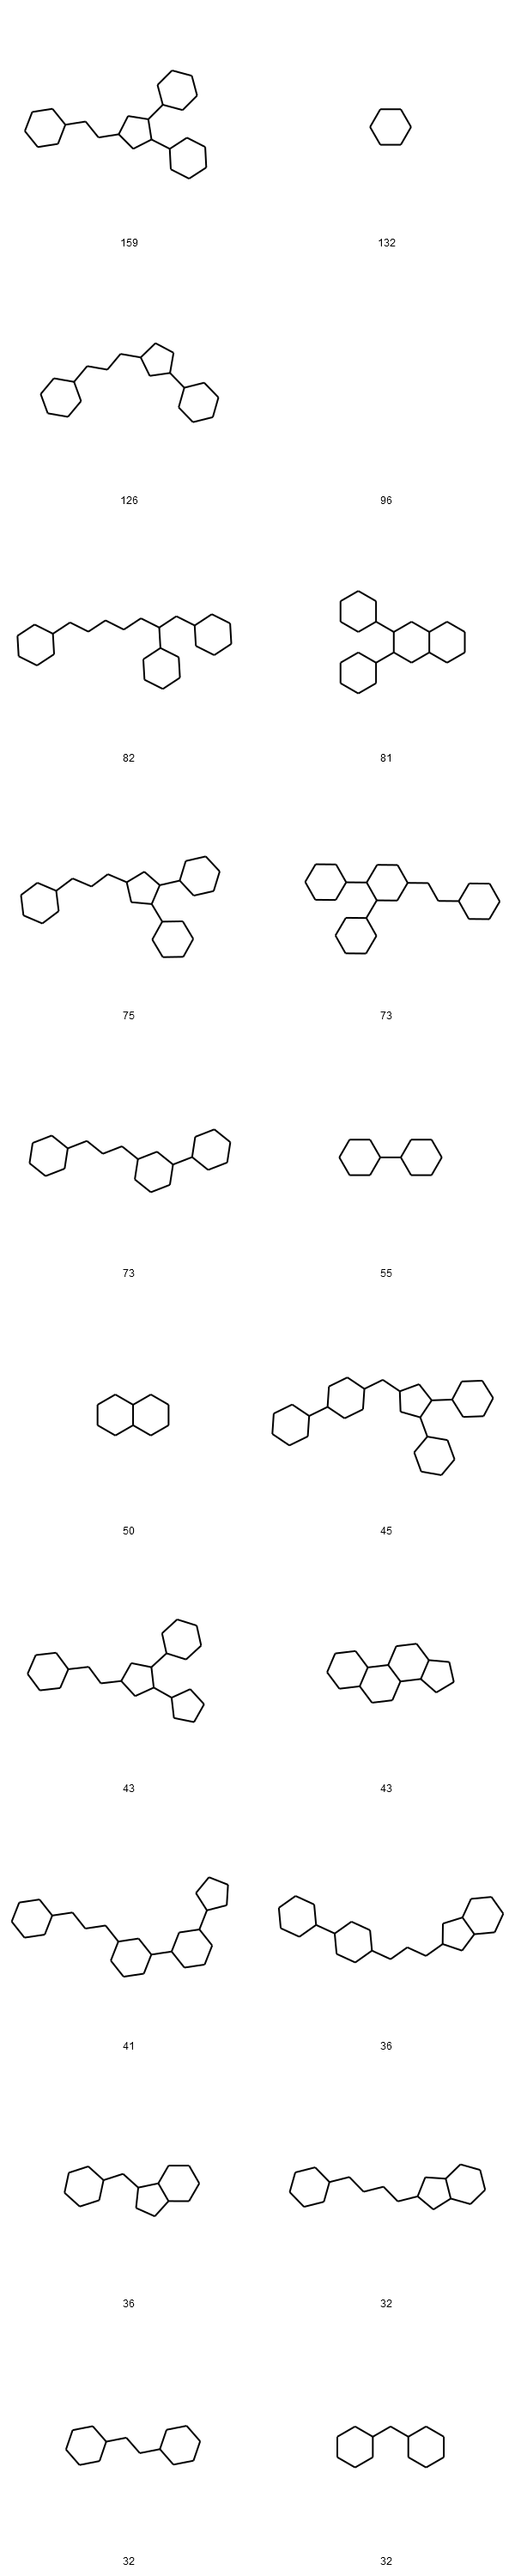

In [28]:
#Scaffold in my dataset
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:20]])

Scaffold in my dataset seem to be more complex than in Drugbank. There are lot of bicyclic structures, and even there is a typical structure for steroids which is cholestane

# Scaffold-based diversity picking

In [33]:
scaffold_representatives = {}
for scaffold, ligands in scaffolds2ligands.items():
    scaffold_representatives[scaffold] = sorted(ligands,
                                                key=lambda x: can_ligands[x].GetProp('pChEMBL'),
                                                reverse=True)[0]
len(scaffold_representatives), scaffold_representatives

(643,
 {'C1CCC(CCCCC2CC3CCCCC3C2)CC1': 2152,
  'C1CCC(CC2CCC(C3CCC(C4CCCCC4)C(C4CCCCC4)C3)CC2)CC1': 1,
  'C1CCC(CCC2CCCC(CC3CCCCC3)C2)CC1': 53,
  'C1CCC(C2CC3CCCCC3C(CCC3CCC(CCC4CCCC4)CC3)C2)CC1': 2594,
  'C1CCC(C2CCC(CCCCC3CC4CCCCC4C3)CC2)CC1': 2210,
  'C1CCC(CCC2CCCC3CCC4CCCCC4C23)CC1': 828,
  'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1': 835,
  'C1CCC(CCCC2CCC3CCC(CC4CCCC(C5CCCCC5)C4)C3C2)CC1': 7,
  'C1CCC2C(C1)CCC2CC1CCCC(C2CCCC3CCCC32)C1': 671,
  'C1CCC(C2CCCCC2)CC1': 580,
  'C1CCC2CC3CCCCC3CC2C1': 695,
  'C1CCC2CC3CCCCC3CCC2C1': 11,
  'C1CCCCC1': 1488,
  'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCC3)C2)CC1': 1861,
  'C1CCC(C2CCC3C(C2)CC(C2CCCCC2)C3C2CCCCC2)CC1': 1929,
  'C1CCC(CCC2CCC(C3CCCCC3)C(C3CCCCC3)C2)CC1': 487,
  'C1CCC(CCCC2CCCC(C3CCCCC3)C2)CC1': 16,
  'C1CCC(CC2CCC(CC3CC3C3CCCCC3)CC2)CC1': 1907,
  'C1CCC(CC(CCCCCC2CCCC2)C2CCCCC2)CC1': 1048,
  'C1CCC(C2CCCC3CC(C4CCCCC4)C(C4CCCCC4)CC32)CC1': 20,
  'C1CCC(C2CC3CCCCC3CC3CCCCC32)CC1': 1942,
  'C1CCC(CCCC2CCC3CC4CCCCC4C(C4CCCCC4)CC3C2)CC1': 1

In [39]:
#Vizualisation
scaffold_representatives4visualization = []
for scaffold, ligandcount in scaffold_ligandcount:
    mol = Chem.MolFromSmiles(scaffold)
    mol.SetProp('legend', str(ligandcount) + " ligands")
    scaffold_representatives4visualization.append(mol)
    representative_mol = can_ligands[scaffold_representatives[scaffold]]
    representative_mol.SetProp('legend', "#{} | pChEMBL {}".format(str(scaffold_representatives[scaffold]),
                                                            representative_mol.GetProp('pChEMBL')))
    scaffold_representatives4visualization.append(representative_mol)
len(scaffold_representatives4visualization), scaffold_representatives4visualization[:20]

(1286,
  <rdkit.Chem.rdchem.Mol at 0x19ec9733b20>])

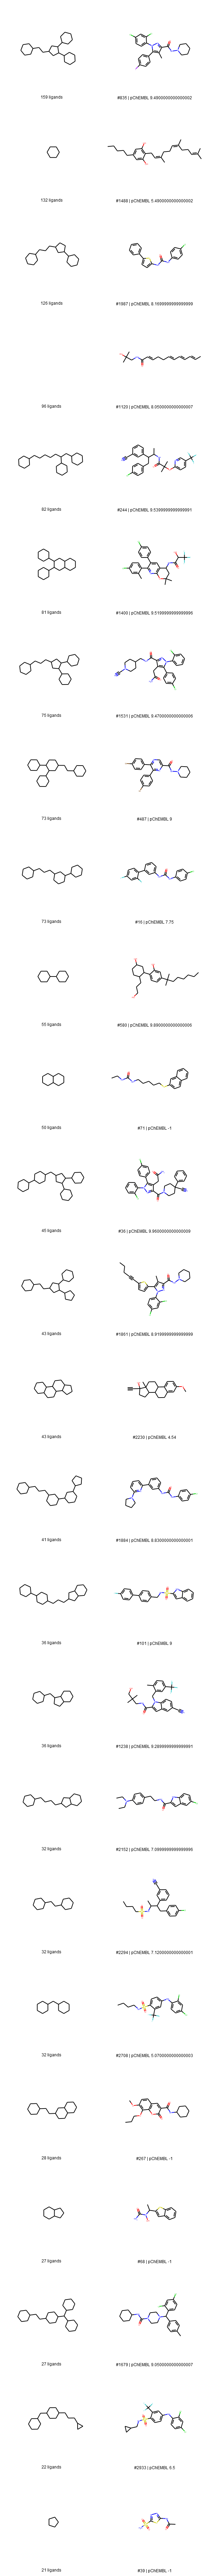

In [40]:
Draw.MolsToGridImage(scaffold_representatives4visualization[:50],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[:50]])

So, this is the simple scaffold-based picking in cannabinoid dataset. 
For each scaffold, the most active cannabinoid ligand was selected .